In [46]:
import pandas as pd
import re
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
student = pd.read_csv('C:/Users/Tommaso/OneDrive/ML_proj/student_dataset/student-mat.csv', sep = ';')
student.head(n =5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
student_2 = pd.read_csv("C:/Users/Tommaso/OneDrive/ML_proj/student_dataset/student-por.csv", sep = ';')
student_2.head(n = 5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
student_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
stud = pd.concat([student, student_2], axis = 0)
stud = pd.DataFrame(stud)
stud.head(n = 5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
corr = stud.corr(method = 'pearson')
round(stud.corr(method = 'pearson'),2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.00,-0.13,-0.14,0.05,-0.01,0.28,0.01,0.00,0.12,0.13,0.10,-0.03,0.15,-0.12,-0.12,-0.13
Medu,-0.13,1.00,0.64,-0.24,0.09,-0.19,0.02,0.00,0.03,0.00,-0.03,-0.01,0.06,0.23,0.22,0.20
Fedu,-0.14,0.64,1.00,-0.20,0.03,-0.19,0.01,0.00,0.03,-0.00,0.02,0.03,0.04,0.20,0.18,0.16
traveltime,0.05,-0.24,-0.20,1.00,-0.08,0.09,-0.01,-0.01,0.05,0.11,0.08,-0.03,-0.02,-0.12,-0.14,-0.10
studytime,-0.01,0.09,0.03,-0.08,1.00,-0.15,0.01,-0.09,-0.07,-0.16,-0.23,-0.06,-0.08,0.21,0.18,0.16
failures,0.28,-0.19,-0.19,0.09,-0.15,1.00,-0.05,0.10,0.07,0.12,0.11,0.05,0.10,-0.37,-0.38,-0.38
famrel,0.01,0.02,0.01,-0.01,0.01,-0.05,1.00,0.14,0.08,-0.08,-0.10,0.10,-0.06,0.04,0.04,0.05
freetime,0.00,0.00,0.00,-0.01,-0.09,0.10,0.14,1.00,0.32,0.14,0.13,0.08,-0.03,-0.05,-0.07,-0.06
goout,0.12,0.03,0.03,0.05,-0.07,0.07,0.08,0.32,1.00,0.25,0.40,-0.01,0.06,-0.10,-0.11,-0.10
Dalc,0.13,0.00,-0.00,0.11,-0.16,0.12,-0.08,0.14,0.25,1.00,0.63,0.07,0.13,-0.15,-0.13,-0.13


<AxesSubplot:>

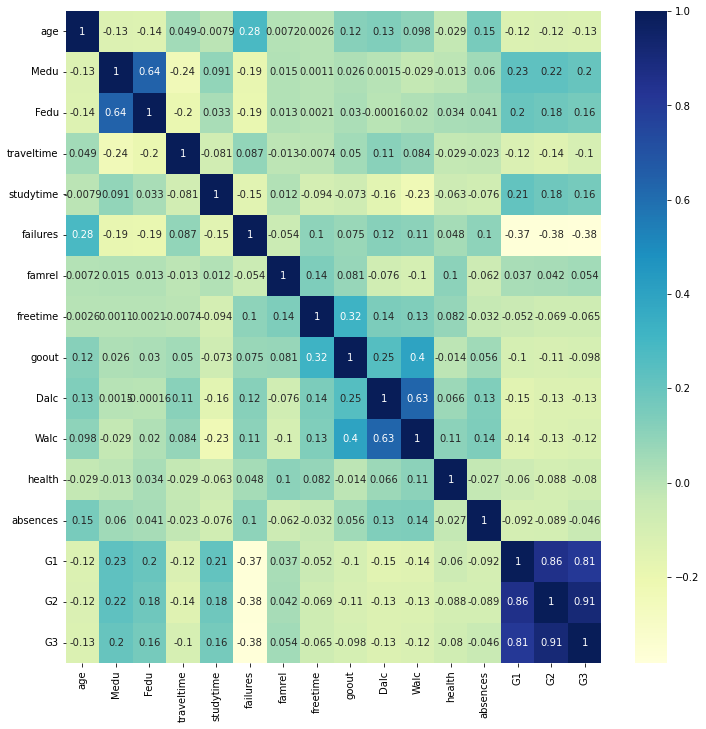

In [8]:
figure(figsize=(12,12))

sns.heatmap(corr, annot = True, cmap = 'YlGnBu')

In [10]:
round(stud.corr()['G3'],2)

age          -0.13
Medu          0.20
Fedu          0.16
traveltime   -0.10
studytime     0.16
failures     -0.38
famrel        0.05
freetime     -0.06
goout        -0.10
Dalc         -0.13
Walc         -0.12
health       -0.08
absences     -0.05
G1            0.81
G2            0.91
G3            1.00
Name: G3, dtype: float64

In [11]:
stud['Famedu'] = stud['Medu'] + stud['Fedu']

In [17]:
round(stud['G3'].corr(stud['Famedu']),4)

0.1996

In [27]:
Median = stud['G3'].median()
Mean = round(stud['G3'].mean(),3)
Max = round(stud['G3'].max(),3)
Min = round(stud['G3'].min(),3)
print(f"""Central tendencies:
\tMean: {Mean}
\tMedian: {Median}
\tMaximum: {Max}
\tMinimum: {Min}""")

Central tendencies:
	Mean: 11.342
	Median: 11.0
	Maximum: 20
	Minimum: 0


In [35]:
stud.groupby('Fedu').mean()['G3']

Fedu
0    12.333333
1    10.367188
2    11.243827
3    11.636364
4    12.254464
Name: G3, dtype: float64

In [37]:
stud.groupby('Fedu')['G3'].count()

Fedu
0      9
1    256
2    324
3    231
4    224
Name: G3, dtype: int64

In [41]:
round(265/len(stud)*100,2)

25.38

One quarter of students have fathers with 4th grade or less. Among them, students who have parents with no education are well above the average in terms of grades. At the opposite, among those who have fathers with low grade of educaion are on average below the mean.

In [32]:
stud.groupby('Medu').mean()['G3']

Medu
0    12.111111
1    10.178218
2    10.972318
3    11.247899
4    12.509804
Name: G3, dtype: float64

In [38]:
stud.groupby('Medu')['G3'].count()

Medu
0      9
1    202
2    289
3    238
4    306
Name: G3, dtype: int64

In [42]:
round(211/len(stud)*100,2)

20.21

About one fifth of students have mothers with no or low level of education. As for fathers, those who have a parent with no education have grades above the average. Those who have a parent with 4th grade as highest level achieved stay well below the average.

It appears that the education of family members has an impact on sons' performance. 
Except for the small amount of people who have parents with no education at all, which will not be considered, there is an increase in the performance as the education of mothers and daughters increases. Considered mothers and fathers with 4th grade or less, their sons have a average in grades equal to 10.2 and 10.3 respectively. Compared to a mean of 11.3, they are well below. 
But parents with secondary education have sons on average, 11.3, or above it, 11.6.

Probably policies should incentive students to achieve the highest level of education possible in order to create a positive environment for their sons. 